In [13]:
import configue
import importlib
from pathlib import Path

from transformers import AutoModelForCausalLM, AutoTokenizer
from colpali_engine.models.late_interaction.colphi3.modeling_phi3_v import Phi3VModel

# model = Phi3VModel.from_pretrained("microsoft/Phi-3-vision-128k-instruct", _attn_implementation="eager")


config_path = Path("scripts/configs/pali/train_colpali_model.yaml")
config = configue.load(config_path, sub_path="config")


The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/models/paligemma/configuration_paligemma.py:137: FutureWarning: The `vocab_size` attribute is deprecated and will be removed in v4.44, Please use `text_config.vocab_size` instead.
  warnings.warn(
`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Some weights of ColPali were not initialized from the model checkpoint at google/paligemma-3b-mix-448 and are newly initialized: ['custom_text_proj.bias', 'custom_text_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Configurating PEFT model
trainable params: 39,292,928 || all params: 2,963,906,416 || trainable%: 1.3257


In [14]:
config.dataset_loading_func()

Resolving data files:   0%|          | 0/82 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/82 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/104 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'image_filename', 'query', 'answer', 'source', 'options', 'page', 'model', 'prompt', 'answer_type'],
        num_rows: 118195
    })
    test: Dataset({
        features: ['image', 'image_filename', 'query', 'answer', 'source', 'options', 'page', 'model', 'prompt', 'answer_type'],
        num_rows: 500
    })
})

In [1]:
from colpali_engine.models.late_interaction.colphi3.modeling_phi3_v import Phi3VForCausalLM

model = Phi3VForCausalLM.from_pretrained("microsoft/Phi-3-vision-128k-instruct", _attn_implementation="eager")
model

d:\anaconda3\envs\colpali\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [01:38<00:00, 49.45s/it]


Phi3VForCausalLM(
  (model): Phi3VModel(
    (embed_tokens): Embedding(32064, 3072, padding_idx=32000)
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (vision_embed_tokens): Phi3ImageEmbedding(
      (drop): Dropout(p=0.0, inplace=False)
      (wte): Embedding(32064, 3072, padding_idx=32000)
      (img_processor): CLIPVisionModel(
        (vision_model): CLIPVisionTransformer(
          (embeddings): CLIPVisionEmbeddings(
            (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
            (position_embedding): Embedding(577, 1024)
          )
          (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (encoder): CLIPEncoder(
            (layers): ModuleList(
              (0-23): 24 x CLIPEncoderLayer(
                (self_attn): CLIPSdpaAttention(
                  (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
                  (v_proj): Linear(in_features=1024, out_features=1024, bias=

In [1]:
from colpali_engine.models.late_interaction.colphi3.modeling_phi3_v import Phi3VModel

model = Phi3VModel.from_pretrained("microsoft/Phi-3-vision-128k-instruct", _attn_implementation="eager")
model

d:\anaconda3\envs\colpali\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [01:13<00:00, 36.66s/it]


Phi3VModel(
  (embed_tokens): Embedding(32064, 3072, padding_idx=32000)
  (embed_dropout): Dropout(p=0.0, inplace=False)
  (vision_embed_tokens): Phi3ImageEmbedding(
    (drop): Dropout(p=0.0, inplace=False)
    (wte): Embedding(32064, 3072, padding_idx=32000)
    (img_processor): CLIPVisionModel(
      (vision_model): CLIPVisionTransformer(
        (embeddings): CLIPVisionEmbeddings(
          (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
          (position_embedding): Embedding(577, 1024)
        )
        (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (encoder): CLIPEncoder(
          (layers): ModuleList(
            (0-23): 24 x CLIPEncoderLayer(
              (self_attn): CLIPSdpaAttention(
                (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
                (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
                (q_proj): Linear(in_features=1024, out_feat

In [1]:
from transformers import PaliGemmaForConditionalGeneration

model = PaliGemmaForConditionalGeneration.from_pretrained("google/paligemma-3b-mix-448")

d:\anaconda3\envs\colpali\Lib\site-packages\transformers\models\paligemma\configuration_paligemma.py:137: FutureWarning: The `vocab_size` attribute is deprecated and will be removed in v4.44, Please use `text_config.vocab_size` instead.
  warnings.warn(
`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.
Loading checkpoint shards: 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]


In [2]:
model

PaliGemmaForConditionalGeneration(
  (vision_tower): SiglipVisionModel(
    (vision_model): SiglipVisionTransformer(
      (embeddings): SiglipVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1152, kernel_size=(14, 14), stride=(14, 14), padding=valid)
        (position_embedding): Embedding(1024, 1152)
      )
      (encoder): SiglipEncoder(
        (layers): ModuleList(
          (0-26): 27 x SiglipEncoderLayer(
            (self_attn): SiglipSdpaAttention(
              (k_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (v_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (q_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (out_proj): Linear(in_features=1152, out_features=1152, bias=True)
            )
            (layer_norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=True)
            (mlp): SiglipMLP(
              (activation_fn): PytorchGELUTanh()
              (fc1): Linear(in_feature

In [5]:
import configue
import importlib
from pathlib import Path

from transformers import AutoModelForCausalLM, AutoTokenizer
from colpali_engine.models.late_interaction.colphi3.modeling_phi3_v import Phi3VModel

config_path = Path("/teamspace/studios/this_studio/colphi3/scripts/configs/phi/train_colphi_model.yaml")
config = configue.load(config_path, sub_path="config")

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of ColPhi3 were not initialized from the model checkpoint at microsoft/Phi-3-vision-128k-instruct and are newly initialized: ['custom_text_proj.bias', 'custom_text_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


pynvml not found. GPU stats will not be printed.
Configurating PEFT model
trainable params: 27,267,072 || all params: 4,075,781,248 || trainable%: 0.6690


In [6]:
dataset = config.dataset_loading_func()
train = dataset['train']

Resolving data files:   0%|          | 0/82 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/82 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/104 [00:00<?, ?it/s]

In [7]:
train[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x1600>,
 'image_filename': 'images/1810.07757_2.jpg',
 'query': 'Comparing panels a, b, c, and d, which statement best describes the data variance?',
 'answer': 'D',
 'source': 'arxiv_qa',
 'options': "['A. The variance of the data decreases from panel a to panel d.', 'B. The variance of the data increases from panel a to panel d.', 'C. The data presents no variance in any of the panels.', 'D. The variance of the data is inconsistent across the panels.', '-']",
 'page': '',
 'model': 'gpt4V',
 'prompt': '',
 'answer_type': None}

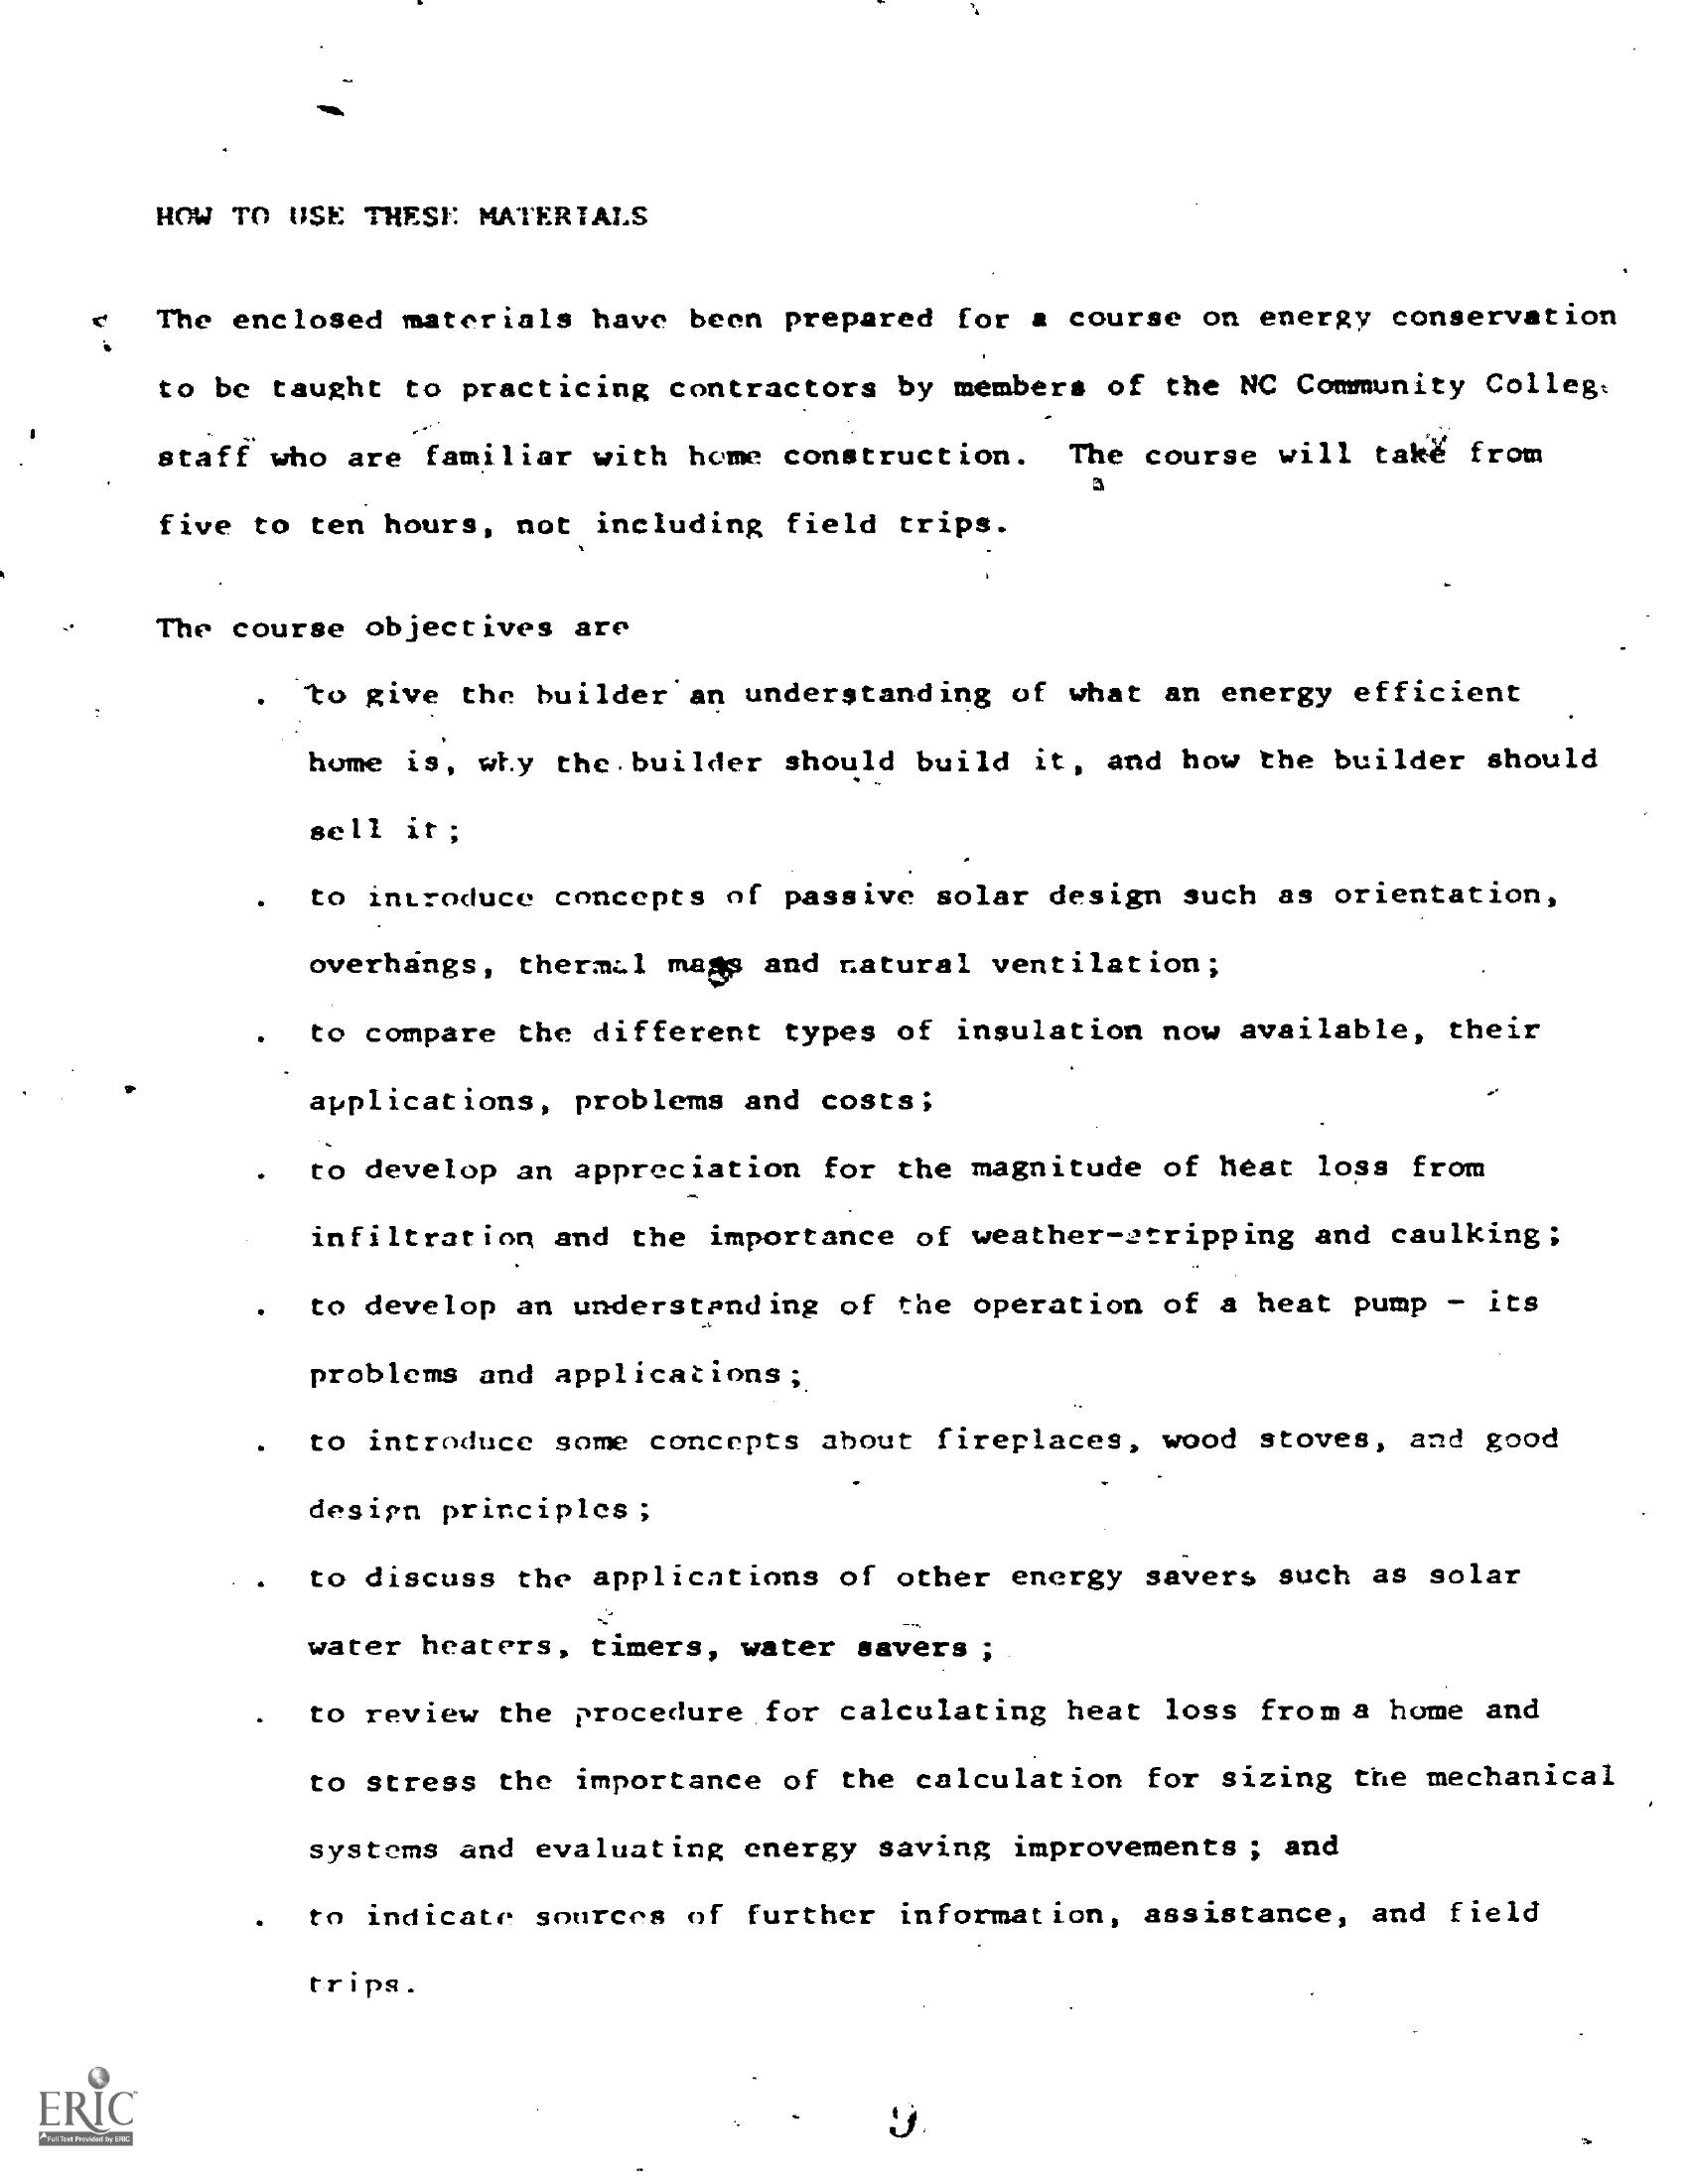

In [12]:
train[int(1)]["image"].convert("RGB")

In [60]:
from colpali_engine.models.late_interaction.colphi3.processing_phi3_v import Phi3VProcessor
import requests
from transformers import AutoProcessor
from PIL import Image
processor = AutoProcessor.from_pretrained("microsoft/Phi-3-vision-128k-instruct", trust_remote_code = True)
suffix =  "<|endoftext|>" * 5

messages_query = [
        {"role": "user", "content": f"<|image_1|>\nHow are you?" + suffix},
    ]
text_query = processor.tokenizer.apply_chat_template(
        messages_query, tokenize=False, add_generation_prompt=False
    )

url = "https://www.ilankelman.org/stopsigns/australia.jpg"
print(f">>> Prompt\n{text_query}")
image = train[int(1)]["image"].convert("RGB")

>>> Prompt
<|user|>
<|image_1|>
How are you?<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|end|>



In [61]:
examples = train.select(range(5))

In [62]:
examples

Dataset({
    features: ['image', 'image_filename', 'query', 'answer', 'source', 'options', 'page', 'model', 'prompt', 'answer_type'],
    num_rows: 5
})

In [64]:

texts_doc = []
images = []
texts_query = []
for example in examples:
    print(example)
    image = example["image"].convert("RGB")
    text_query = None
    if example['query'] is not None:
        query = example['query'] + suffix
        messages_query = [
            
                {"role": "user", "content": f"{query}" },
                
            
        ]
        text_query = processor.tokenizer.apply_chat_template(messages_query,tokenize = False, add_generation_prompt=False, ).strip()

    messages_doc = [
                {"role": "user", "content": "<|image_1|>\nDescribe the image."},

    ]

    text_doc = processor.tokenizer.apply_chat_template(messages_doc,tokenize = False,  add_generation_prompt=False).strip()

    texts_doc.append(text_doc.strip())
    texts_query.append(text_query)
    images.append(image.convert("RGB"))

print(images)
print(texts_doc)

batch_doc = {"input_ids}

for i, text 
batch_doc = processor(
    text=texts_doc[0],
    images=images[0],
    return_tensors="pt",
    padding="longest",
    max_length=2048
)


print(batch_doc)

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x1600 at 0x7F20CACF7850>, 'image_filename': 'images/1810.07757_2.jpg', 'query': 'Comparing panels a, b, c, and d, which statement best describes the data variance?', 'answer': 'D', 'source': 'arxiv_qa', 'options': "['A. The variance of the data decreases from panel a to panel d.', 'B. The variance of the data increases from panel a to panel d.', 'C. The data presents no variance in any of the panels.', 'D. The variance of the data is inconsistent across the panels.', '-']", 'page': '', 'model': 'gpt4V', 'prompt': '', 'answer_type': None}
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1700x2200 at 0x7F20CACF6CE0>, 'image_filename': 'data/scrapped_pdfs_split/pages_extracted/energy_train/1d09a977-063b-463f-a897-2eda99c1a4f6.pdf/page_9.jpg', 'query': 'What is the duration of the course mentioned in the image?', 'answer': "['five to ten hours, not including field trips']", 'source': 'pdf', 'options': None

In [57]:
processor = AutoProcessor.from_pretrained("google/paligemma-3b-mix-448", trust_remote_code = True)

texts_doc = []
images = []
texts_query = []
for example in examples:
    if example["image"] is None:
                raise ValueError("Image is None - This collator does not support None images yet.")

    image = example["image"].convert("RGB")
    images.append(image)
    texts_doc.append("Describe the image.")

    if "neg_image" in example and example["neg_image"] is not None:
        neg_image = example["neg_image"].convert("RGB")
        neg_images.append(neg_image)

    if example["query"] is None:
        texts_query.append(None)
    else:
        query = example["query"]
        query = f"Question: {query}"
        # add pad tokens
        query += suffix
        texts_query.append(query)

print(images)
print(texts_doc)
batch_doc = processor(
    text=texts_doc,
    images=images,
    return_tensors="pt",
    padding="longest",
    max_length=2048
)

print(batch_doc)

[<PIL.Image.Image image mode=RGB size=1000x1600 at 0x7F20CACF6890>, <PIL.Image.Image image mode=RGB size=1700x2200 at 0x7F20CACF7340>, <PIL.Image.Image image mode=RGB size=1475x1850 at 0x7F20CACF51E0>, <PIL.Image.Image image mode=RGB size=1709x2293 at 0x7F20CACF5FF0>, <PIL.Image.Image image mode=RGB size=1784x2287 at 0x7F20CACF50F0>]
['Describe the image.', 'Describe the image.', 'Describe the image.', 'Describe the image.', 'Describe the image.']
{'input_ids': tensor([[257152, 257152, 257152,  ...,   2416, 235265,    108],
        [257152, 257152, 257152,  ...,   2416, 235265,    108],
        [257152, 257152, 257152,  ...,   2416, 235265,    108],
        [257152, 257152, 257152,  ...,   2416, 235265,    108],
        [257152, 257152, 257152,  ...,   2416, 235265,    108]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'pixel_values': tensor

In [51]:
batch_doc['input_ids'].shape

torch.Size([5, 1030])